In [51]:
import numpy
import iris
import matplotlib.pyplot as plt
import matplotlib.cm as cm       

import warnings
warnings.filterwarnings('ignore')

In [18]:
%matplotlib inline

In [14]:
tfile = '/g/data/ua6/DRSv2/CMIP5/CCSM4/historical/mon/ocean/r1i1p1/thetao/latest/thetao_Omon_CCSM4_historical_r1i1p1_200001-200512.nc'
sfile = '/g/data/ua6/DRSv2/CMIP5/CCSM4/historical/mon/ocean/r1i1p1/so/latest/so_Omon_CCSM4_historical_r1i1p1_200001-200512.nc'
vfile = '/g/data/r87/dbi599/DRSv2/CMIP5/CCSM4/historical/fx/ocean/r0i0p0/volcello/latest/volcello-inferred_fx_CCSM4_historical_r0i0p0.nc'

In [15]:
tcube = iris.load_cube(tfile)
scube = iris.load_cube(sfile)
vcube = iris.load_cube(vfile)

In [16]:
tcube = tcube.collapsed('time', iris.analysis.MEAN)
scube = scube.collapsed('time', iris.analysis.MEAN)

In [33]:
xdata = scube.data.flatten() * 1000
ydata = tcube.data.flatten() - 273.15
cdata = vcube.data.flatten()

One approach is to use [plt.hexbin](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hexbin.html). (In pandas you might use [pandas.DataFrame.plot.hexbin](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hexbin.html) instead).

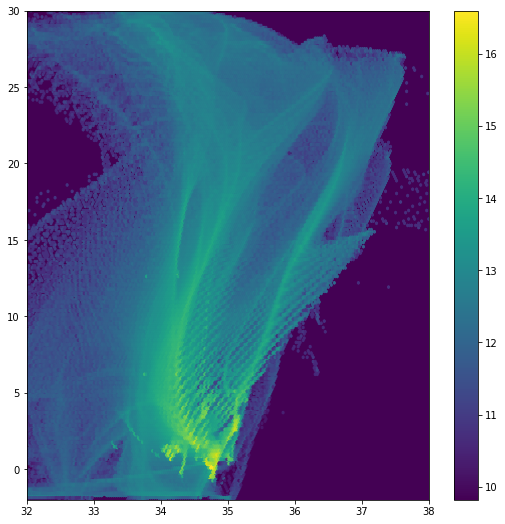

In [62]:
fig = plt.figure(figsize=[9, 9])

ax = fig.add_subplot(111, facecolor=cm.viridis(0))

plt.hexbin(xdata, ydata, C=cdata, reduce_C_function=numpy.sum,
           gridsize=200, bins='log', extent=(32, 38, -2, 30))  #mincnt=16
#plt.axis([xmin, xmax, ymin, ymax])
#plt.title("With a log color scale")
cb = plt.colorbar()  # extend='min'
plt.ylim(-2, 30)
plt.xlim(32, 38)
#cb.set_label('log10(N)')
plt.show()

The problem is that I don't have the actual bin values in order to create a difference plot. In order to get those, I could run [scipy.stats.binned_statistic_2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic_2d.html). I'd then have to use a heat mapping package to create the plot.